In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None


In [169]:

data = pd.read_csv("Modified_HR_Data_with_Nulls.csv")
data.head()

,EmployeeNumber,Emplyee name,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Barak Sali,41.0,Yes,Travel_Rarely,NaN,Sales,1,2,Life Sciences,...,1,80,0,8,0,1,6.0,4,0,5
1,2,Mumin Yusha,49.0,No,Travel_Frequently,279.0,Research & Development,8,1,Life Sciences,...,4,80,1,10,3,3,10.0,7,1,7
2,4,Cordia M Knopp,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2,2,Other,...,2,80,0,7,3,3,0.0,0,0,0
3,5,Burton C Jin,33.0,No,Travel_Frequently,1392.0,Research & Development,3,4,Life Sciences,...,3,80,0,8,3,3,8.0,7,3,0
4,7,Femi Grek,27.0,No,Travel_Rarely,591.0,Research & Development,2,1,Medical,...,4,80,1,6,3,3,2.0,2,2,2


In [170]:
data.Over18.nunique()

1

In [171]:
data.StandardHours.nunique()

1

In [172]:
data.EmployeeCount.nunique()

1

In [173]:
#Columns that have only 1 value or irrelevalnt for the analysis
data.drop(columns=['Over18','EmployeeCount', 'StandardHours','Emplyee name', 'EmployeeNumber.1'], inplace=True)

In [174]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
Age,1397.0,36.948461,9.210772,18.0,30.00,36.0,43.00,60.0
DailyRate,1397.0,803.281317,403.672451,102.0,465.00,802.0,1162.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1397.0,2.731568,1.103634,1.0,2.00,3.0,4.00,4.0


In [175]:
#making sure all remaining numeric columns have different data 
# if standard diveation = 0 then all data in the column have same values
data.std(numeric_only=True)

EmployeeNumber               602.024335
Age                            9.210772
DailyRate                    403.672451
DistanceFromHome               8.106864
Education                      1.024165
EnvironmentSatisfaction        1.093082
HourlyRate                    20.329428
JobInvolvement                 0.711561
JobLevel                       1.106940
JobSatisfaction                1.103634
MonthlyIncome               4707.956783
MonthlyRate                 7117.786044
NumCompaniesWorked             2.498009
PercentSalaryHike              3.659938
PerformanceRating              0.360824
RelationshipSatisfaction       1.081209
StockOptionLevel               0.852077
TotalWorkingYears              7.780782
TrainingTimesLastYear          1.289271
WorkLifeBalance                0.706476
YearsAtCompany                 6.153534
YearsInCurrentRole             3.623137
YearsSinceLastPromotion        3.222430
YearsWithCurrManager           3.568136
dtype: float64

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            1470 non-null   int64  
 1   Age                       1397 non-null   float64
 2   Attrition                 1470 non-null   object 
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1397 non-null   float64
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [177]:
data.isna().sum()

EmployeeNumber               0
Age                         73
Attrition                    0
BusinessTravel               0
DailyRate                   73
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction             73
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany              73
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager         0
dtype: i

In [178]:
#handling missing values for numerical columns

data['Age'] = data['Age'].fillna(data['Age'].median())
data['DailyRate'] = data['DailyRate'].fillna(data['DailyRate'].median())
data['YearsAtCompany'] = data['YearsAtCompany'].fillna(data['YearsAtCompany'].median())

In [179]:
#handling missing values for categorical columns
data['JobSatisfaction'] = data['JobSatisfaction'].fillna(data['JobSatisfaction'].mode()[0])


In [180]:
data.isna().sum()

EmployeeNumber              0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [181]:
data.to_csv("Clean_data.csv", index = False)

Text(0.5, 1.0, 'Attrition By Age')

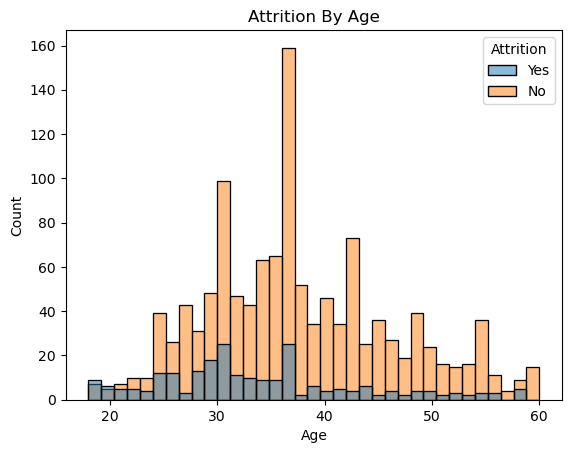

In [182]:
sns.histplot(data=data, x="Age", hue="Attrition", bins= 35)
plt.title("Attrition By Age")

Text(0.5, 1.0, 'Attrition By Distance From Home')

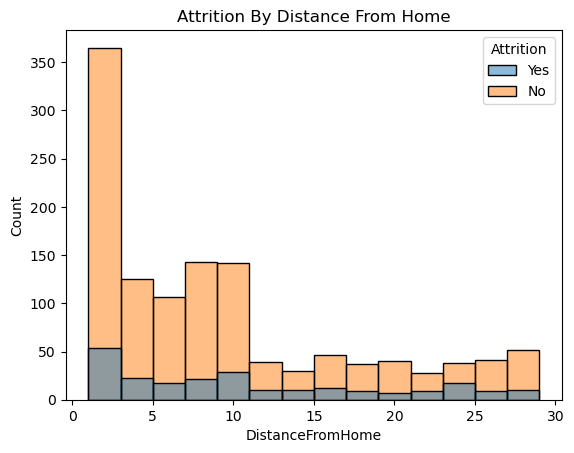

In [183]:
sns.histplot(data=data, x="DistanceFromHome", hue="Attrition")
plt.title("Attrition By Distance From Home")

Text(0.5, 1.0, 'Attrition By Job Satisfaction')

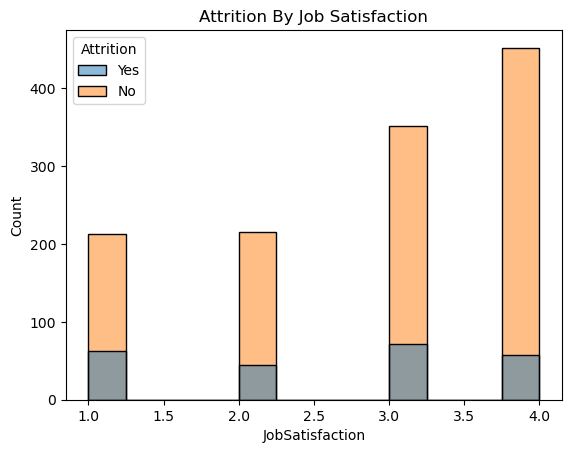

In [184]:
sns.histplot(data=data, x="JobSatisfaction", hue="Attrition")
plt.title("Attrition By Job Satisfaction")

Text(0.5, 1.0, 'Attrition by Work Life Balance')

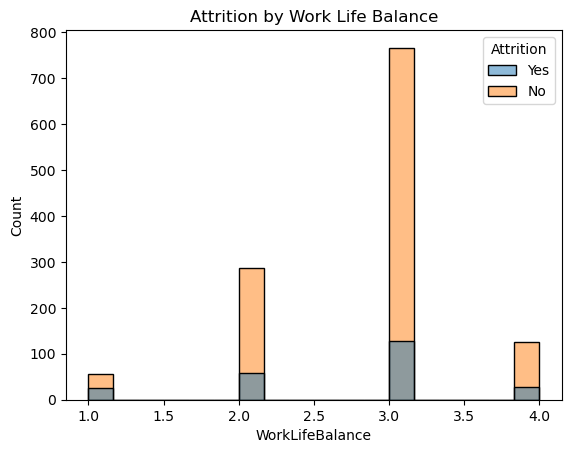

In [185]:
sns.histplot(data=data, x="WorkLifeBalance", hue="Attrition")
plt.title("Attrition by Work Life Balance")

Text(0.5, 1.0, 'Attition by Years At Company')

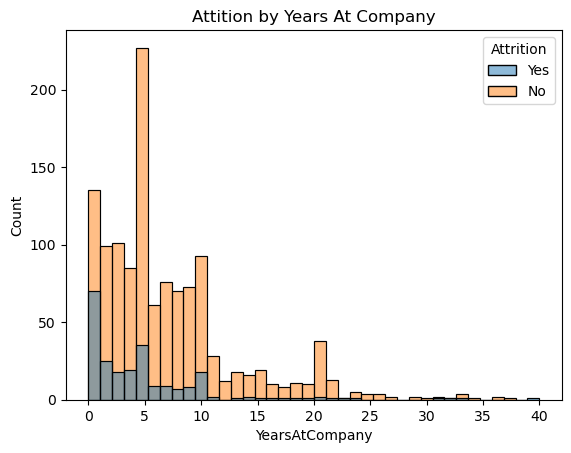

In [186]:
sns.histplot(data=data, x="YearsAtCompany", hue="Attrition")
plt.title("Attition by Years At Company")

Text(0.5, 1.0, 'Attition by Total Working Years')

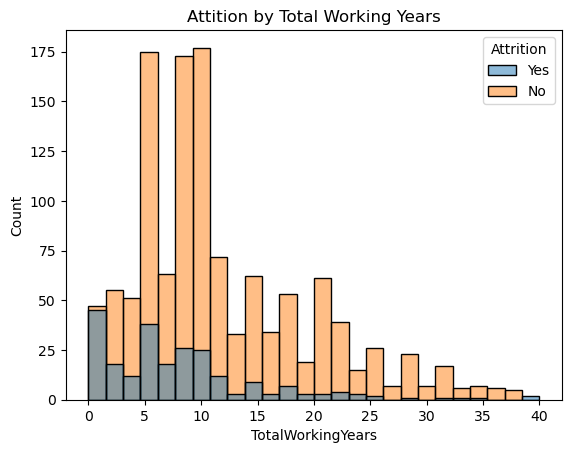

In [187]:
sns.histplot(data=data, x="TotalWorkingYears", hue="Attrition")
plt.title("Attition by Total Working Years")

Text(0.5, 1.0, 'Attrition By Monthly Income')

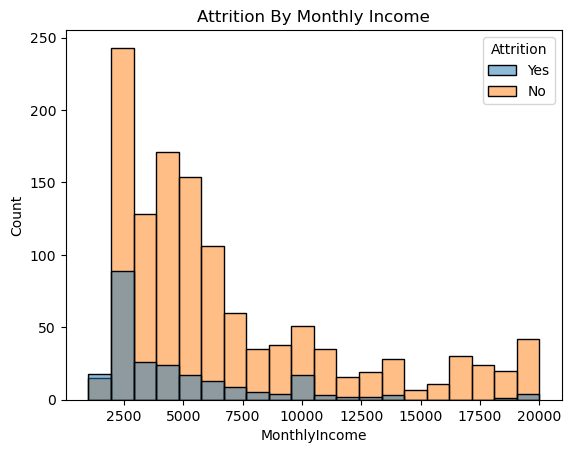

In [188]:
sns.histplot(data=data, x= data.MonthlyIncome, hue='Attrition')
plt.title('Attrition By Monthly Income')

In [189]:
data[data.OverTime=="Yes"].Attrition.value_counts()

No     289
Yes    127
Name: Attrition, dtype: int64

Text(0.5, 1.0, 'No OverTime')

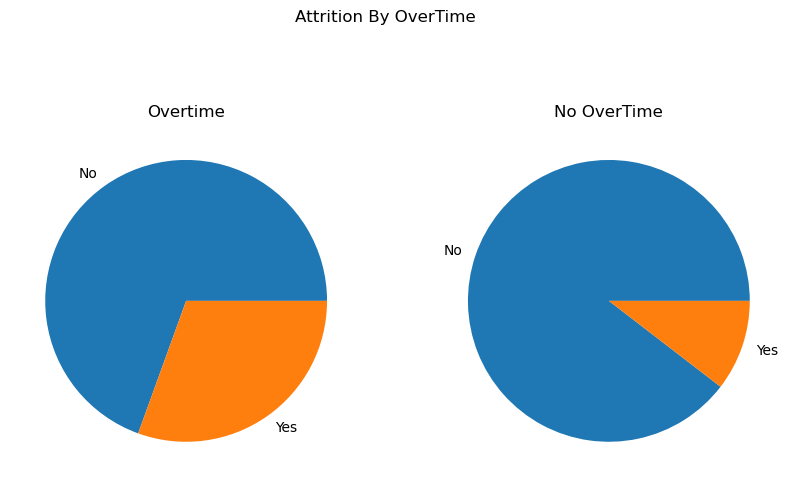

In [190]:
plt.figure(figsize=(10,6))
plt.suptitle("Attrition By OverTime")


plt.subplot(1,2,1)
plt.pie(x=data[data.OverTime=="Yes"].Attrition.value_counts(), labels=['No','Yes'])
plt.title("Overtime")

plt.subplot(1,2,2)
plt.pie(x=data[data.OverTime=="No"].Attrition.value_counts(), labels=['No','Yes'])
plt.title("No OverTime")

In [191]:
import plotly.express as px
df_avg_income = data.groupby(['YearsAtCompany', 'JobRole']).agg({'MonthlyIncome': 'mean'}).reset_index()

# Create the line chart
fig = px.line(df_avg_income, x='YearsAtCompany', y='MonthlyIncome', color='JobRole',
              title='Average Monthly Income Change Over Years at Company by Job Role',
              labels={'YearsAtCompany': 'Years at Company', 'MonthlyIncome': 'Average Monthly Income'},
              markers=True)

# Show the plot
fig.show()

In [192]:
gender_count_df = data.groupby(['Department', 'Attrition']).size().reset_index(name='Count')

fig = px.sunburst(gender_count_df,
                  path=['Department', 'Attrition'],
                  values='Count',
                  title="Nested Pie Chart of Attrition Distribution in Department")
fig.update_layout(width=800, height=600)
fig.show()

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            1470 non-null   int64  
 1   Age                       1470 non-null   float64
 2   Attrition                 1470 non-null   object 
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   float64
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [194]:
numericalfeature=data.select_dtypes("number").columns

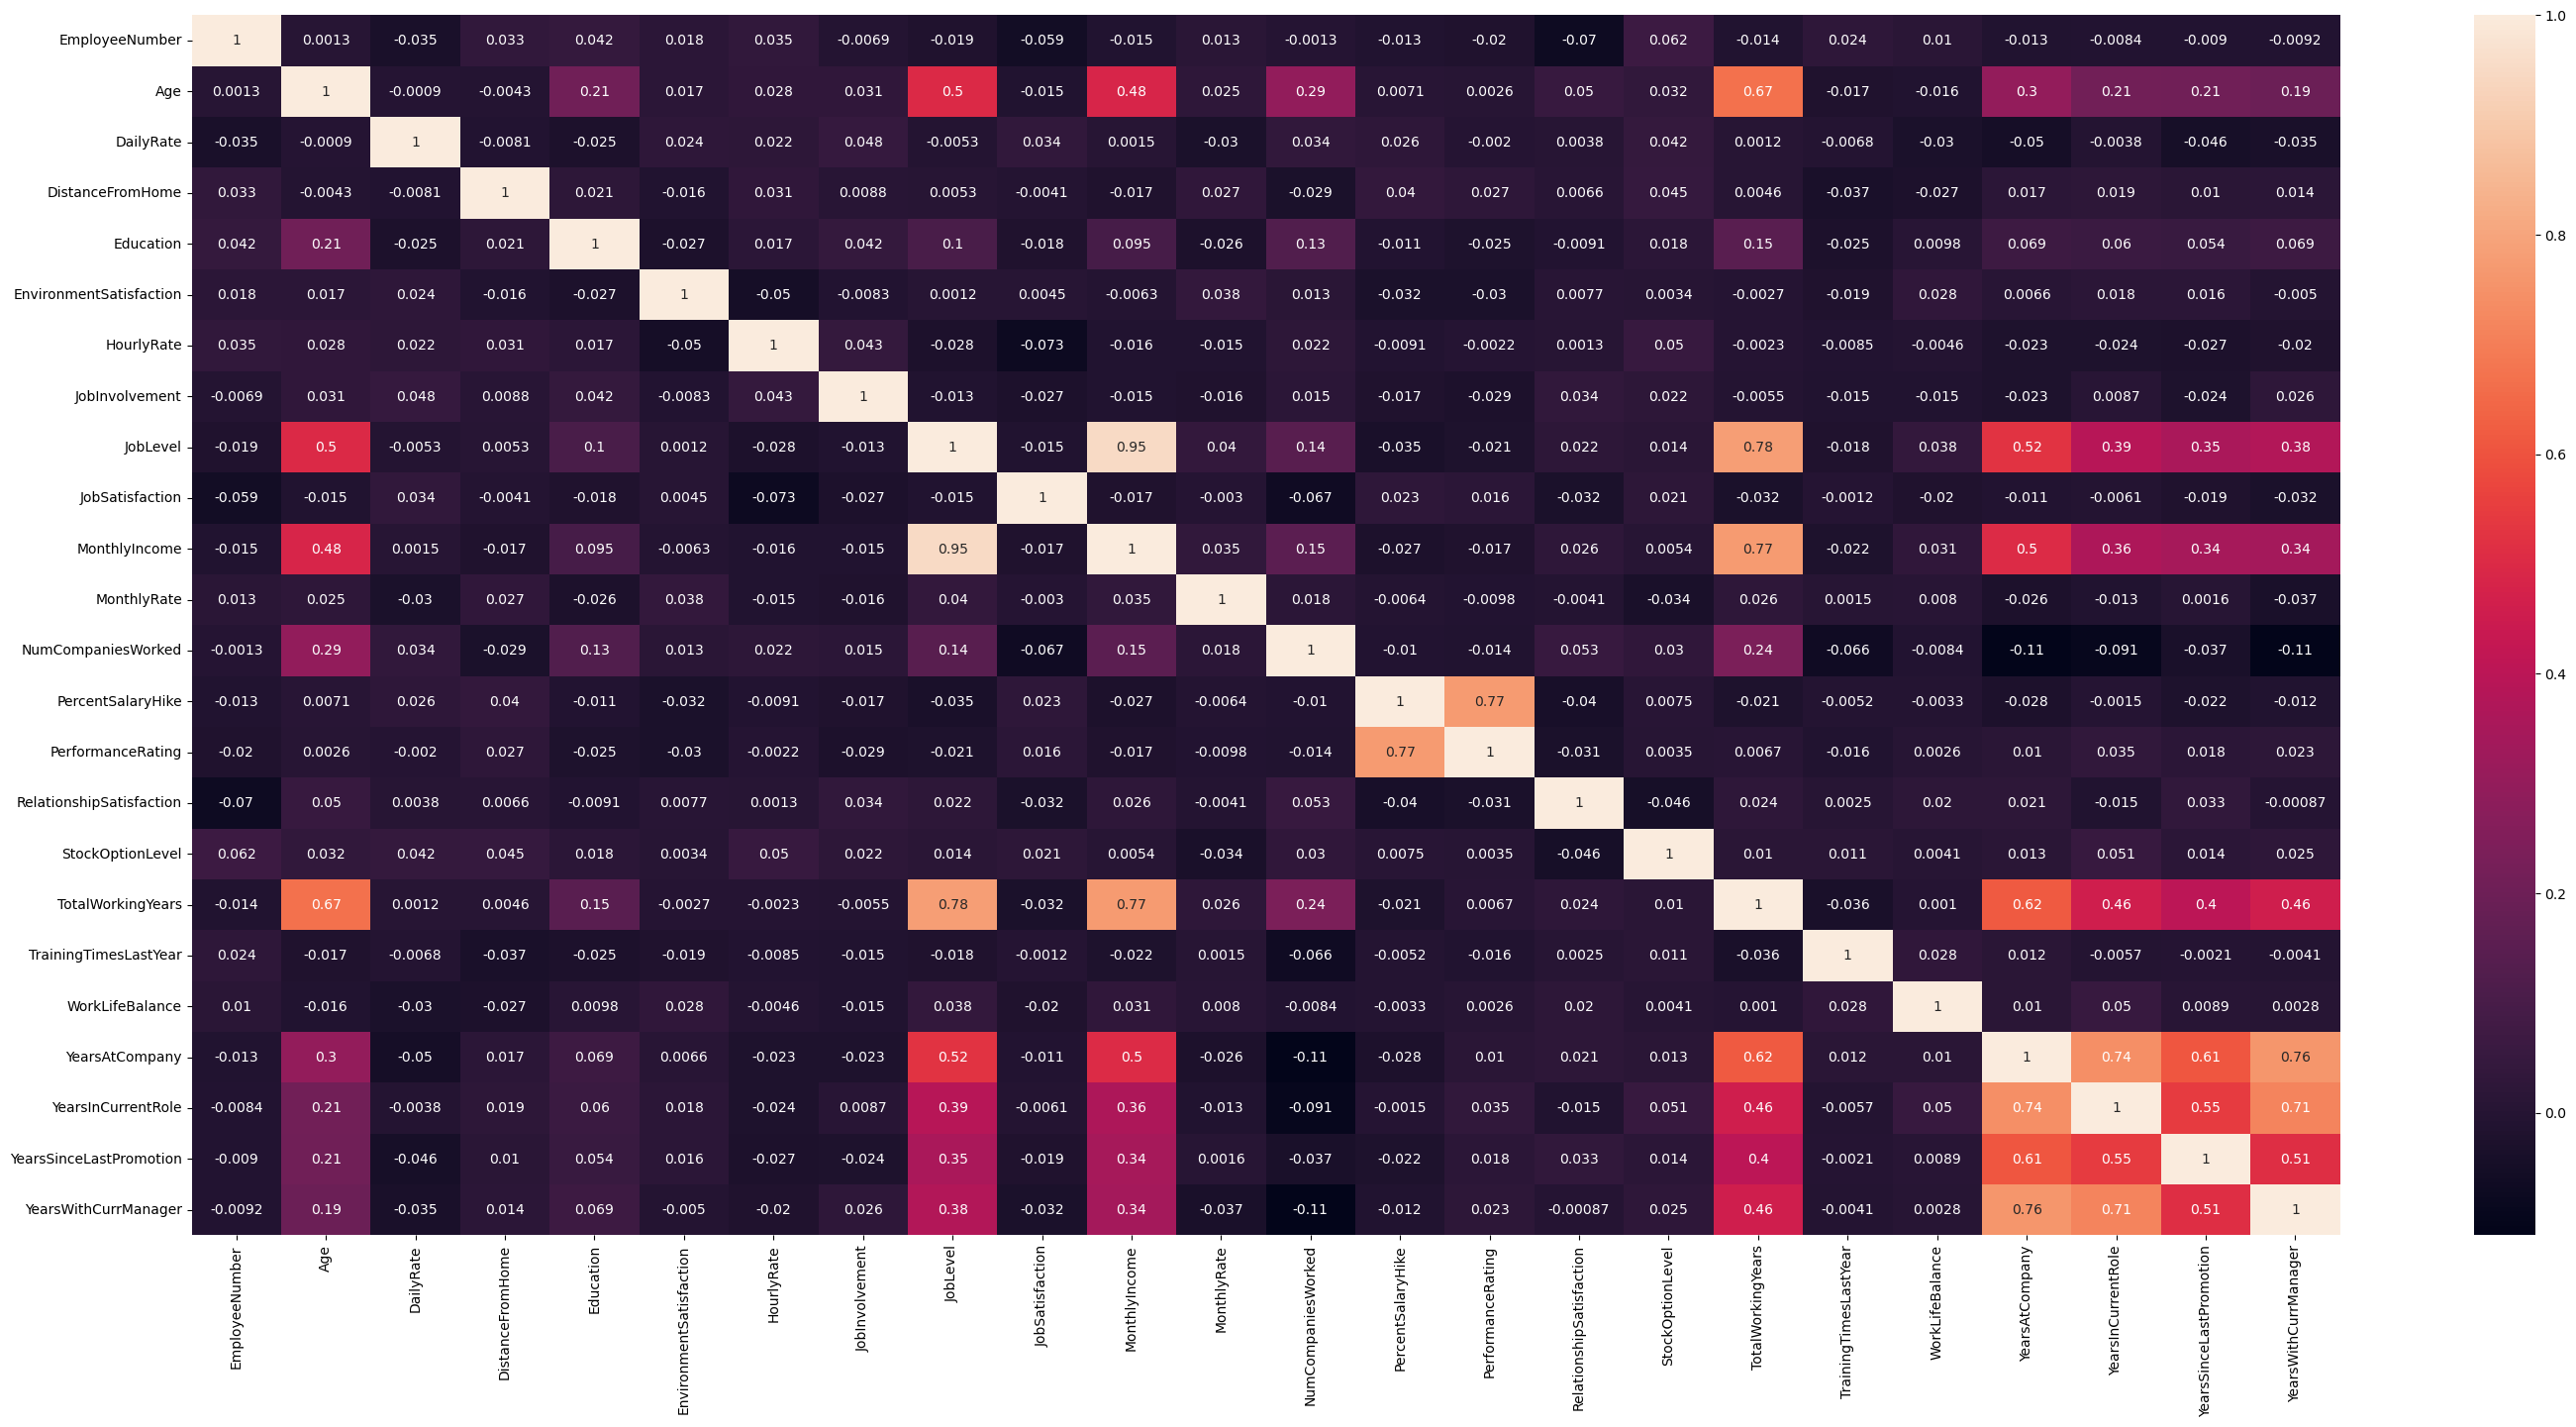

In [195]:
plt.figure(figsize=(35, 16))
corr_matrix = data[numericalfeature].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [196]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in data.select_dtypes("object").columns:
    data[col]=encoder.fit_transform(data[col])

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            1470 non-null   int64  
 1   Age                       1470 non-null   float64
 2   Attrition                 1470 non-null   int32  
 3   BusinessTravel            1470 non-null   int32  
 4   DailyRate                 1470 non-null   float64
 5   Department                1470 non-null   int32  
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   int32  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   int32  
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole 

In [211]:
data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Accuracy: 0.9635135135135136
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       369
           1       0.95      0.98      0.96       371

    accuracy                           0.96       740
   macro avg       0.96      0.96      0.96       740
weighted avg       0.96      0.96      0.96       740



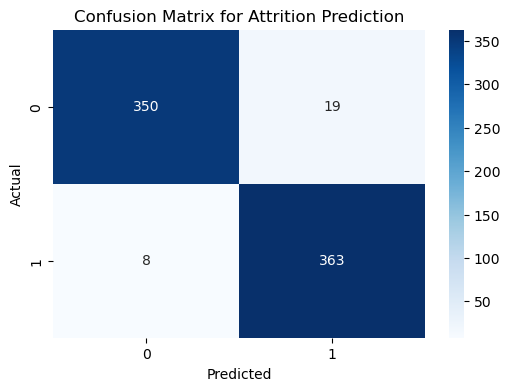

In [210]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
from sklearn.ensemble import RandomForestClassifier



# Split data into features (X) and target (y)
X = data.drop(columns='Attrition')
y = data['Attrition']
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC


rus = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_overesampled, y_overesampled = rus.fit_resample(X, y)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_overesampled, y_overesampled, test_size=0.3, random_state=42)





# apply pca
pca = PCA(n_components=20)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)
x_train_pca = pd.DataFrame(x_train_pca)
x_test_pca = pd.DataFrame(x_test_pca)


model = RandomForestClassifier()
model.fit(x_train_pca, y_train)

# Make predictions
y_pred = model.predict(x_test_pca)

# Print evaluation metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Attrition Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [200]:
X_train.shape

(1726, 31)

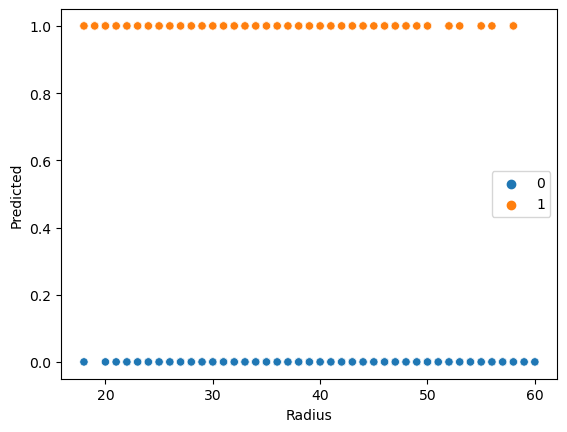

In [201]:
y_pred = y_pred.squeeze()
x_test_view = X_test["Age"].values.squeeze()
sns.scatterplot(x = x_test_view, y = y_pred, hue = y_test)
plt.xlabel('Radius')
plt.ylabel('Predicted')
plt.legend()

In [202]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score


# تقسيم الميزات (X) والهدف (y)
X = data.drop('MonthlyIncome', axis=1)
y = data['MonthlyIncome']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pca = PCA(n_components=25)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)
x_train_pca = pd.DataFrame(x_train_pca)
x_test_pca = pd.DataFrame(x_test_pca)

# بناء نموذج الانحدار الخطي
model = LinearRegression()
model.fit(x_train_pca, y_train)

# التنبؤ بالقيم
y_pred = model.predict(x_test_pca)

# تقييم النموذج
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')
px.scatter(x=y_pred,y=y_test,trendline='ols')


Mean Squared Error: 2307326.37
R^2 Score: 0.89


In [203]:
data["PerformanceRating"].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [204]:
data["JobSatisfaction"].value_counts()

4.0    510
3.0    424
1.0    276
2.0    260
Name: JobSatisfaction, dtype: int64

c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           3       1.00      0.89      0.94       381
           4       0.90      1.00      0.95       366

    accuracy                           0.94       747
   macro avg       0.95      0.94      0.94       747
weighted avg       0.95      0.94      0.94       747



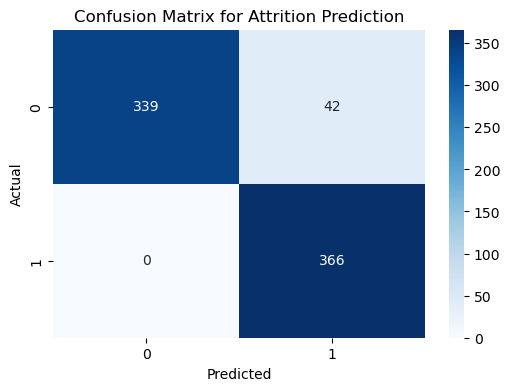

In [205]:
# Performance Rating Prediction
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

# Assuming 'data' is your DataFrame
# Features (X) and target (y)
X = data.drop('PerformanceRating', axis=1)
y = data['PerformanceRating']


rus = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_overesampled, y_overesampled = rus.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_overesampled, y_overesampled, test_size=0.3, random_state=42)

pca = PCA(n_components=25)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)
x_train_pca = pd.DataFrame(x_train_pca)
x_test_pca = pd.DataFrame(x_test_pca)

model = LogisticRegression(C=0.01, random_state=42)

model.fit(x_train_pca, y_train)

# Predictions and evaluation
y_pred = model.predict(x_test_pca)

# Print classification report
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Attrition Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

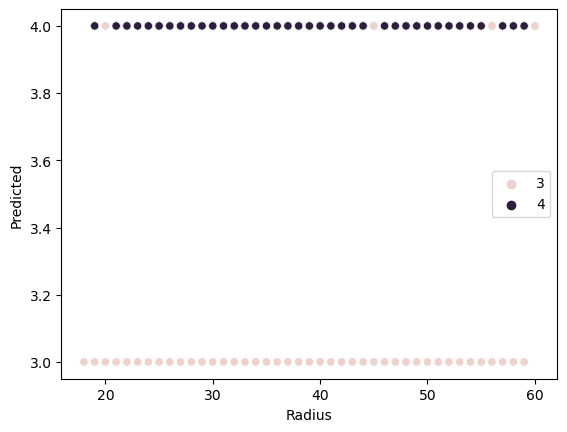

In [206]:
y_pred = y_pred.squeeze()
x_test_view = X_test["Age"].values.squeeze()
sns.scatterplot(x = x_test_view, y = y_pred, hue = y_test)
plt.xlabel('Radius')
plt.ylabel('Predicted')
plt.legend()

In [207]:
data['JobSatisfaction'].value_counts()

4.0    510
3.0    424
1.0    276
2.0    260
Name: JobSatisfaction, dtype: int64

In [208]:
data["WorkLifeBalance"].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       249
           2       0.78      0.89      0.83       245
           3       0.90      0.81      0.85       311
           4       0.99      0.99      0.99       267

    accuracy                           0.92      1072
   macro avg       0.92      0.92      0.92      1072
weighted avg       0.92      0.92      0.92      1072



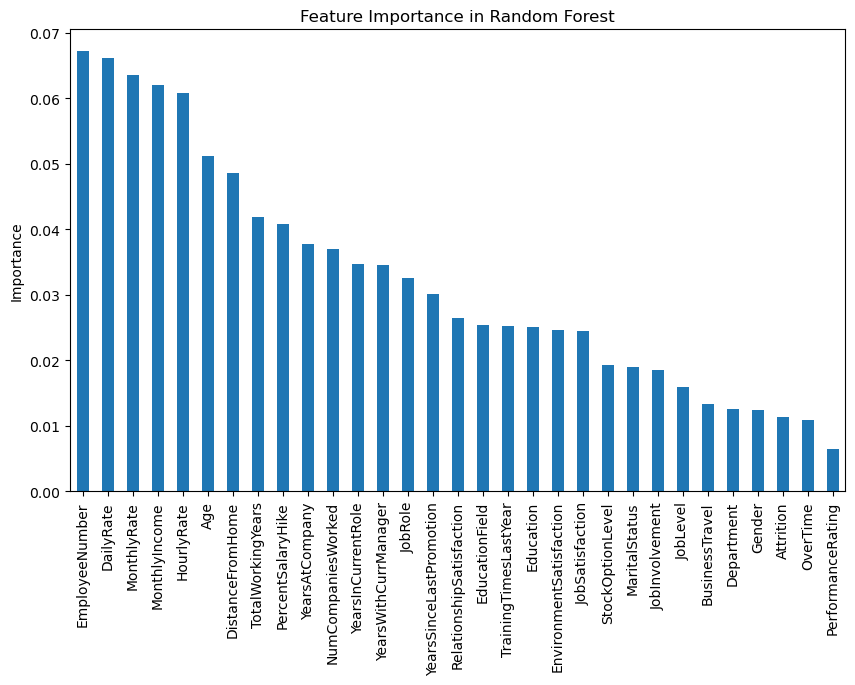

In [209]:
from sklearn.ensemble import RandomForestClassifier
# Split data into features and target
X = data.drop('WorkLifeBalance', axis=1)
y = data['WorkLifeBalance']
rus = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_overesampled, y_overesampled = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_overesampled, y_overesampled, test_size=0.3, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)


print(classification_report(y_pred,y_test))
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance in Random Forest')
plt.ylabel('Importance')
plt.show()